**Universidad Nacional Abierta y a Distancia**

Curso: Análisis de datos

Freddy Ernesto Sanchez

Tarea 3. Algoritmos de Aprendizaje Supervisado

# Tabla de contenido

1. Introduccion

    * 1.1 Ajustar ambiente de programación
    * 1.2 Cargar información

2. Regresión lineal

    * 2.1 Análisis exploratorio de datos
    * 2.2 Preprocesamiento de datos
    * 2.3 Selección de características
    * 2.4 División de datos de entrenamiento y prueba
    * 2.5 Entrenar Modelo
    * 2.6 Evaluar desempeño
    * 2.7. Visualización de resultados
    * 2.8. Interpretación y análisis

3. Regresión Logística

    * 2.1 Análisis exploratorio de datos
    * 2.2 Preprocesamiento de datos
    * 2.3 Selección de características
    * 2.4 División de datos de entrenamiento y prueba
    * 2.5 Entrenar Modelo
    * 2.6 Evaluar desempeño
    * 2.7. Visualización de resultados
    * 2.8. Interpretación y análisis

4. Arboles de decisión
    * 2.1 Análisis exploratorio de datos
    * 2.2 Preprocesamiento de datos
    * 2.3 Selección de características
    * 2.4 División de datos de entrenamiento y prueba
    * 2.5 Entrenar Modelo
    * 2.6 Evaluar desempeño
    * 2.7. Visualización de resultados
    * 2.8. Interpretación y análisis
    
5. Conclusiones

# 1. Introducción

En esta tarea se realizarán tres modelos de aprendizaje supervisado para tres distintas bases de datos. Siguiendo el mismo paso a paso para cada modelo. 

## 1.1. Ajustar ambiente de programación

In [60]:
## Instalar librerias necesarias
#!pip install pandas
#!pip install matplotlib
#!pip install -U scikit-learn
#!pip install kagglehub
#!pip install seaborn

In [190]:
import os # sistema operativo
import re # expresiones regulares para limpieza
import kagglehub # 
import numpy as np # operaciones matriciales
import pandas as pd # manejo de datasets
import matplotlib.pyplot as plt # visualizacion
import seaborn as sns# mejora visual de matplot lib

from sklearn.model_selection import train_test_split # partir data para testeo y entrenamiento
from sklearn.linear_model import LinearRegression # regresion lineal
from sklearn.metrics import mean_squared_error, r2_score # metricas # evaluar metricas de modelos

from sklearn.linear_model import LogisticRegression # regresion logistica
from sklearn.tree import DecisionTreeClassifier # clasificdor de arboles
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay # metricas

import warnings # silenciar advertencias
warnings.filterwarnings("ignore")

# Increase the number of rows and column that can be printed
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## 1.2. Carga información

### Dataset regresion lineal 

In [2]:
# Download latest version
path = kagglehub.dataset_download("nehalbirla/vehicle-dataset-from-cardekho")

print("Path to dataset files:", path)

100%|██████████| 292k/292k [00:00<00:00, 1.06MB/s]

Extracting files...
Path to dataset files: C:\Users\jucas\.cache\kagglehub\datasets\nehalbirla\vehicle-dataset-from-cardekho\versions\4


In [6]:
os.listdir(path)

['car data.csv',
 'CAR DETAILS FROM CAR DEKHO.csv',
 'Car details v3.csv',
 'car details v4.csv']

In [125]:
df11 = pd.read_csv(path+os.sep+'car data.csv')
df12 = pd.read_csv(path+os.sep+'CAR DETAILS FROM CAR DEKHO.csv')
df13 = pd.read_csv(path+os.sep+'Car details v3.csv')
df14 = pd.read_csv(path+os.sep+'Car details v4.csv')

df11.shape, df12.shape, df13.shape, df14.shape

((301, 9), (4340, 8), (8128, 13), (2059, 20))

### Dataset regresion logística

In [7]:
path2 = kagglehub.dataset_download("cherngs/heart-disease-cleveland-uci")

print("Path to dataset files:", path2)

100%|██████████| 3.33k/3.33k [00:00<?, ?B/s]

Extracting files...
Path to dataset files: C:\Users\jucas\.cache\kagglehub\datasets\cherngs\heart-disease-cleveland-uci\versions\1


In [10]:
os.listdir(path2)

['heart_cleveland_upload.csv']

In [17]:
df2 = pd.read_csv(path2+os.sep+'heart_cleveland_upload.csv')
df2.shape

(297, 14)

### Dataset árbol de decisión

Context
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).



In [11]:
path3 = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")

print("Path to dataset files:", path3)

100%|██████████| 25.6k/25.6k [00:00<?, ?B/s]

Extracting files...
Path to dataset files: C:\Users\jucas\.cache\kagglehub\datasets\uciml\red-wine-quality-cortez-et-al-2009\versions\2


In [12]:
os.listdir(path3)

['winequality-red.csv']

In [18]:
df3 = pd.read_csv(path3+os.sep+'winequality-red.csv')
df3.shape

(1599, 12)

# 2. Regresion lineal

Contiene información técnica y de mercado de automóviles. El objetivo es predecir el precio del automóvil en función de sus atributos

## 2.1. Analisis exploratorio de datos

Se selecciona el dataset "Car details v3.csv" ya que contiene las mismas columnas que los dos datasets anteriores, otras columnas adicionales) y más filas lo que permitirá ralizar un mejor modelo. No sé unen las bases de datos ya que se generarian muchos valores faltantes ya que solo 1038 modelos de autos cruzan entre la base 2 y la 3. Adicionalmente, para hacer un modelo inicial de regresion, los datos del df13 bastan.

In [36]:
df11.Car_Name.nunique(), df12.name.nunique(), df13.name.nunique(), df14.Model.nunique()

(98, 1491, 2058, 1050)

In [37]:
len(set(df12.name.unique()).intersection(set(df13.name.unique())))

1038

In [40]:
df13.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')

## 2.2 Preprocesamiento de datos

In [126]:
# columnas numericas
num_cols1 = ['year','selling_price','km_driven','mileage','engine','max_power','torque']
# columnas categoricas
cat_cols1 = ['fuel', 'seller_type', 'transmission','seats']

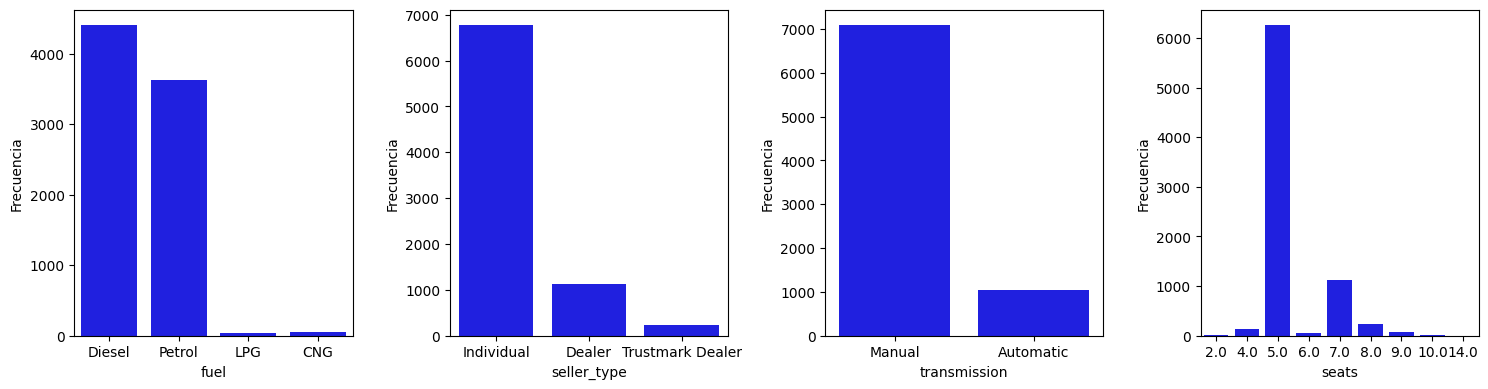

In [127]:
plt.figure(figsize=(15,4))
for i, var in enumerate(cat_cols1):
    plt.subplot(1,4,i+1)
    sns.countplot(x=var, data=df13, color='blue')
    plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

In [128]:
# transformar a numerico milage
df13[num_cols1[3]] = pd.to_numeric(df13[num_cols1[3]].str.split().str[0])
# transformar a numerico engine
df13[num_cols1[4]] = pd.to_numeric(df13[num_cols1[4]].str.split().str[0])
# transformar a numerico max_power
df13[num_cols1[5]] = pd.to_numeric(df13[num_cols1[5]].str.replace("bhp","").str.replace(" ",""))
# transformar a numerico rpm
df13[num_cols1[6]] = pd.to_numeric(df13[num_cols1[6]].astype(str).apply(lambda x: re.findall(r"(\d+)",x)[-1] if len(re.findall(r"(\d+)",x))>0 else ''))

In [129]:
df13[num_cols1].describe().transpose() # estadisticas de variables

,count,mean,std,min,25%,50%,75%,max
year,8128.0,2013.804011,4.044249,1983.0,2011.00,2015.0,2017.00,2020.0
selling_price,8128.0,638271.807702,806253.403508,29999.0,254999.00,450000.0,675000.00,10000000.0
km_driven,8128.0,69819.510827,56550.554958,1.0,35000.00,60000.0,98000.00,2360457.0
mileage,7907.0,19.418783,4.037145,0.0,16.78,19.3,22.32,42.0
engine,7907.0,1458.625016,503.916303,624.0,1197.00,1248.0,1582.00,3604.0
max_power,7912.0,91.517919,35.822499,0.0,68.05,82.0,102.00,400.0
torque,7906.0,2947.931444,1060.910479,0.0,2200.00,2800.0,4000.00,5300.0


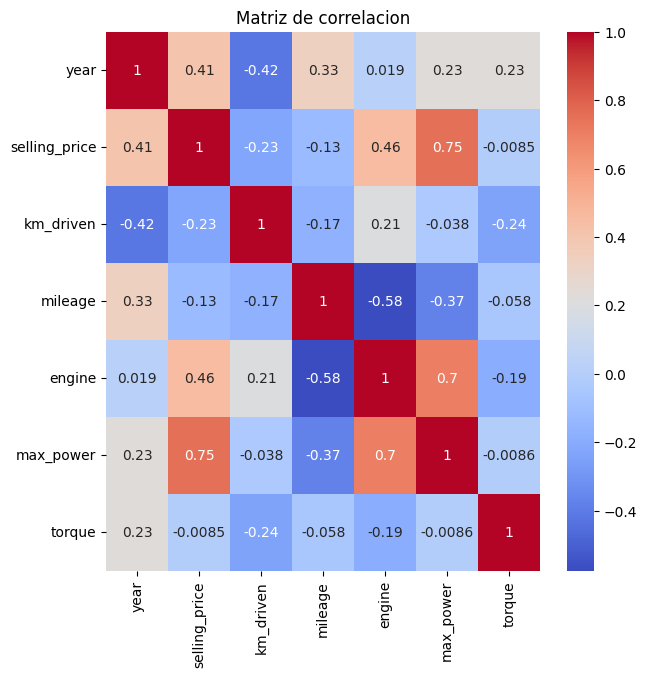

In [172]:
plt.figure(figsize=(7,7))
corr_matrix = df13[num_cols1].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de correlacion")
plt.show()

## 2.3 Selección de características

Se seleccionan las variables numericas continuas como una primera aproximacion a la regresion

## 2.4 División de datos de entrenamiento y prueba

La variable a predecir, es el precio de venta del automovil

In [130]:
X1 = df13[[e for e in num_cols1 if 'selling' not in e]]
y1 = df13['selling_price']

In [131]:
# llenadod e faltantes de variables continuas utilizando el promedio de cada columna
for col in X1.columns.tolist():
    print(f"Conteo de faltante en {col}: {X1[col].isna().sum()}, valor promedio {X1[col].mean()}")
    X1[col] = X1[col].fillna(X1[col].mean())

Conteo de faltante en year: 0, valor promedio 2013.8040108267717
Conteo de faltante en km_driven: 0, valor promedio 69819.51082677166
Conteo de faltante en mileage: 221, valor promedio 19.41878335651954
Conteo de faltante en engine: 221, valor promedio 1458.625015808777
Conteo de faltante en max_power: 216, valor promedio 91.51791898382203
Conteo de faltante en torque: 222, valor promedio 2947.9314444725524


In [132]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

## 2.5 Entrenar Modelo

In [133]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train1, y_train1)

LinearRegression()

## 2.6 Evaluar desempeño

In [134]:
# Realizar predicciones en el conjunto de prueba
y_pred1 = model.predict(X_test1)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test1, y_pred1)  # Error cuadrático medio

r2 = r2_score(y_test1, y_pred1)             # Coeficiente de determinación R^2

# Mostrar resultados
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación R^2: {r2:.2f}")

Error cuadrático medio (MSE): 229036467803.23
Coeficiente de determinación R^2: 0.65


## 2.7. Visualización de resultados

In [160]:
df1 = X_test1
df1['pred'] = y_pred1
df1['test'] = y_test1

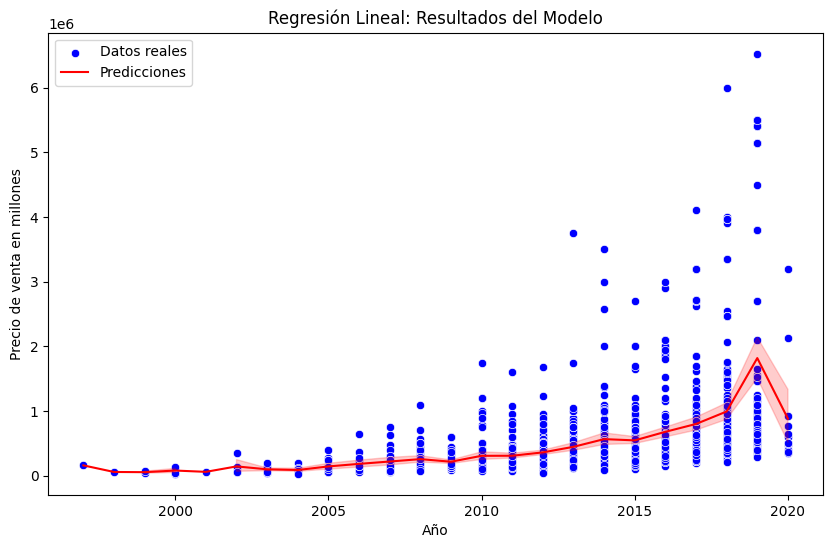

In [ ]:
# Visualizar los resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x="year", y="test", data=df1, color="blue", label="Datos reales")
sns.lineplot(x="year", y="test", data=df1, color="red", label="Predicciones")
plt.xlabel("Año")
plt.ylabel("Precio de venta en millones")
plt.title("Regresión Lineal: Resultados del Modelo")
plt.legend()
plt.show()

## 2.8. Interpretación y análisis

Estandarizacion necesaria para que las variables con numeros mas grandes no arrastren el modelo. StandardScaler
Se le puede dar mas peso al max_power ya que tiene mayor correlacion con la variable dependiente

# 3. Regresion logistica

Variable objetivo - presencia de la enfermedad cardiaca

## 3.1. Analisis exploratorio de datos

In [167]:
df2.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0


In [168]:
df2[df2.columns].describe().transpose() # estadisticas de variables

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,2.158249,0.964859,0.0,2.0,2.0,3.0,3.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


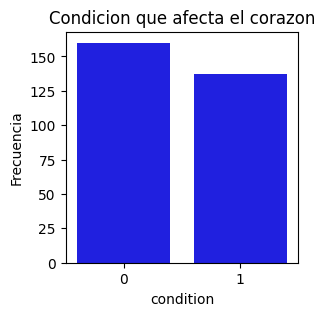

In [177]:
# variable a predecir - enfermedad cardiaca
plt.figure(figsize=(3,3))
sns.countplot(data=df2, x="condition", color='blue')
plt.ylabel("Frecuencia")
plt.title("Condicion que afecta el corazon")
plt.show()

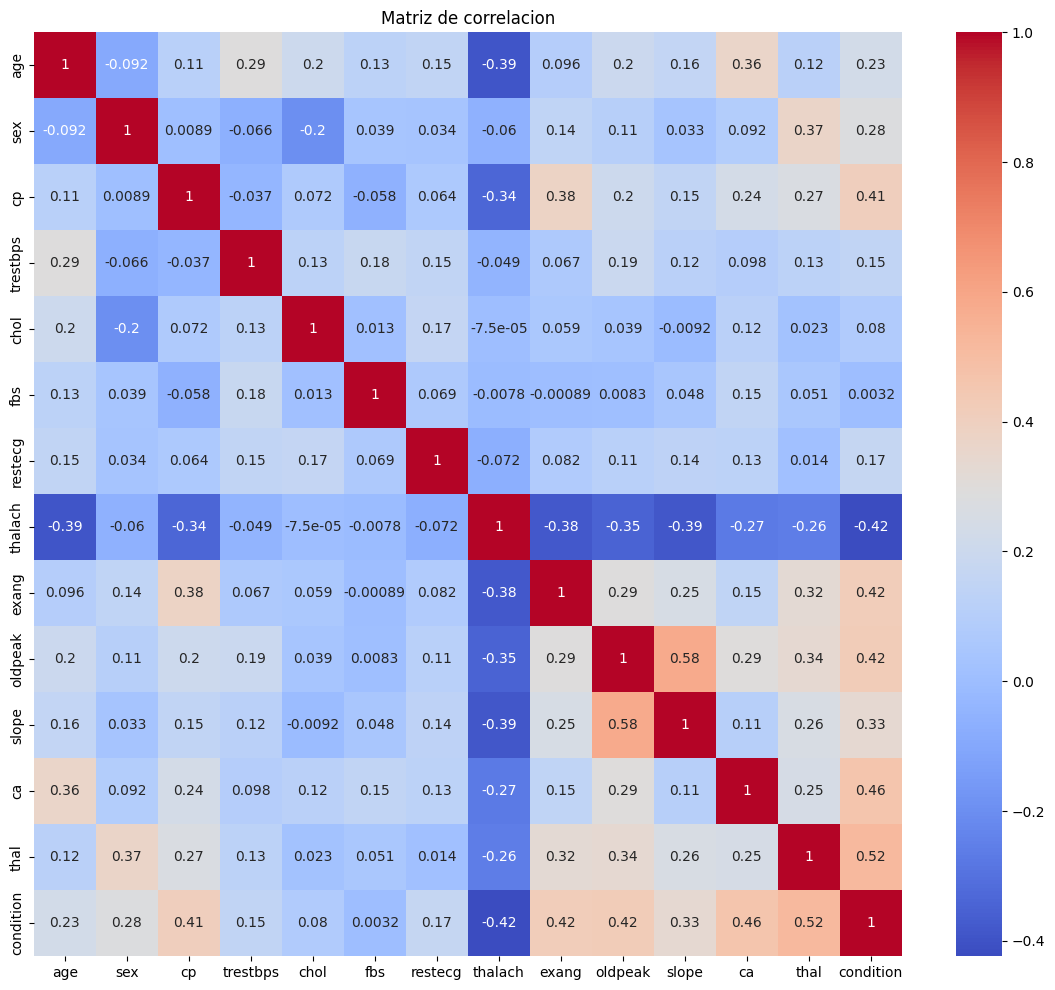

In [183]:
plt.figure(figsize=(14,12))
corr_matrix = df2.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de correlacion")
plt.show()

## 3.2 Preprocesamiento de datos

Todas las variables son numericas y no hay datos faltantes.

No se hace eliminacion de datos atipicos ya que tenemos una poca cantidad de datos y podria afectar al modelo.

## 3.3 Selección de características

Como se ve en el diagrama de correlaciones no hay una que se acerque a 1 por lo tanto se utilizaran todas las variables

## 3.4 División de datos de entrenamiento y prueba

In [187]:
X2 = df2[[e for e in df2.columns.tolist() if 'conditi' not in e]]
y2 = df2['condition']

In [188]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

## 3.5 Entrenar Modelo

In [193]:
# Crear el modelo de regresión lineal
model2 = LogisticRegression()

# Entrenar el modelo con el conjunto de entrenamiento
model2.fit(X_train2, y_train2)

LogisticRegression()

## 3.6 Evaluar desempeño

In [194]:
y_pred2 = model2.predict(X_test2)
accuracy = accuracy_score(y_test2, y_pred2)
print(f"Precision del modelo: {accuracy}")

Precision del modelo: 0.7333333333333333


## 3.7. Visualización de resultados

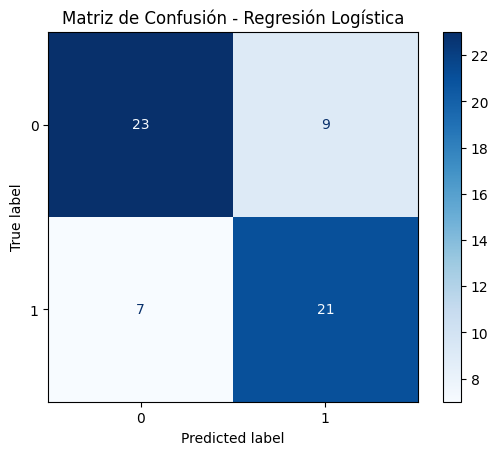

In [195]:
# Calcular y visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test2, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

## 3.8. Interpretación y análisis

# 4. Arbol de decision

## 4.1. Analisis exploratorio de datos

In [198]:
df3.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [200]:
df3[df3.columns].describe().transpose() # estadisticas de variables

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


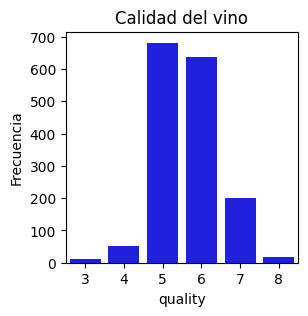

In [202]:
# variable a predecir - calidad del vino
plt.figure(figsize=(3,3))
sns.countplot(data=df3, x="quality", color='blue')
plt.ylabel("Frecuencia")
plt.title("Calidad del vino")
plt.show()

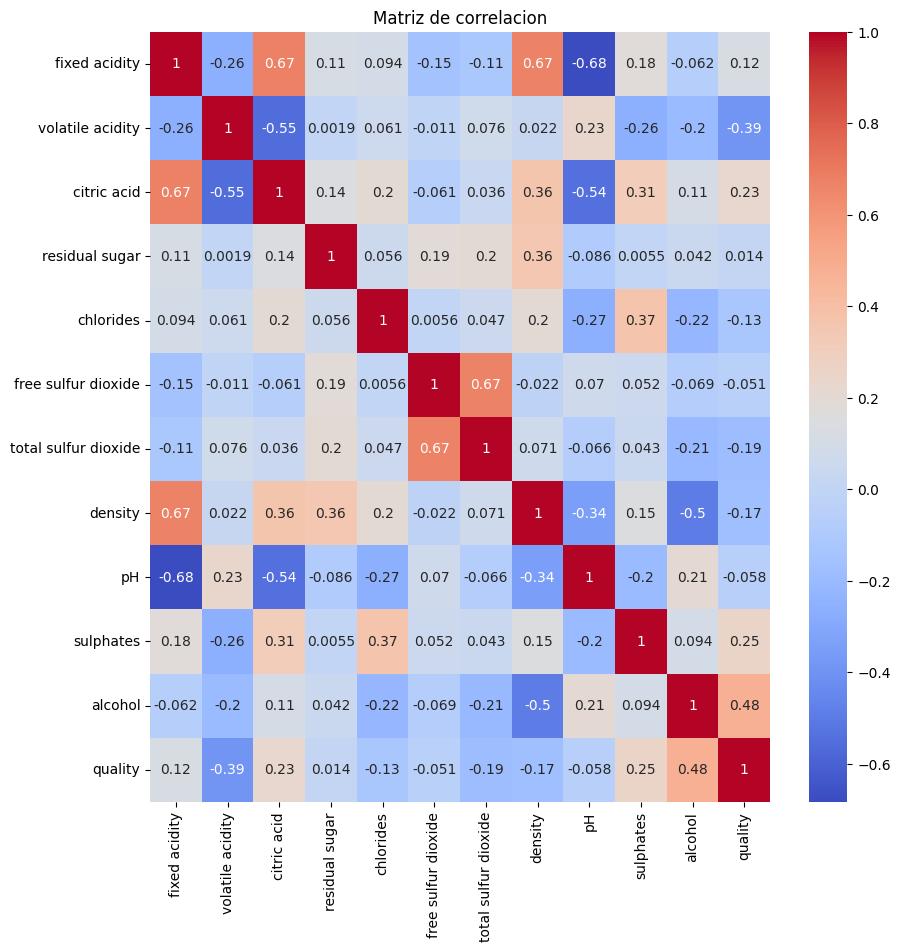

In [204]:
plt.figure(figsize=(10,10))
corr_matrix = df3.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de correlacion")
plt.show()

## 4.2 Preprocesamiento de datos

Se podria cambiar la variable objetivo, calidad del vino a una variable binaria ya que la mayoria de calificaciones fueron 5 o 6 pero a manera de ejercicio se mantendran las 6 opciones

## 4.3 Selección de características

Se seleccionan todas las variables, el pH y la acidez estan relacionadas y se hubiera esperado una mayor correlacion pero al .68 se decide mantener ambas caracteristicas.

## 4.4 División de datos de entrenamiento y prueba

In [205]:
X3 = df3[[e for e in df3.columns.tolist() if 'quality' not in e]]
y3 = df3['quality']

In [207]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

## 4.5 Entrenar Modelo

In [208]:
# Crear y entrenar el modelo de árbol de decisiones
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train3, y_train3)

DecisionTreeClassifier(random_state=42)

## 4.6 Evaluar desempeño

In [209]:
# Predecir los valores en el conjunto de prueba
y_pred3 = clf.predict(X_test3)

In [210]:
# Evaluar el rendimiento del modelo usando la matriz de confusión y precisión
accuracy = accuracy_score(y_test3, y_pred3)
print(f"Precision: {accuracy:.2f}")

Precision: 0.56


## 4.7. Visualización de resultados

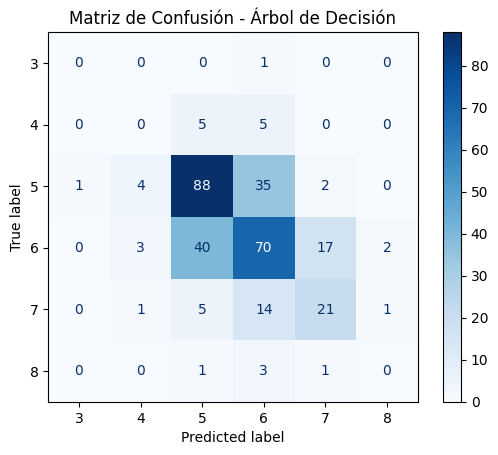

In [211]:
# Matriz de confusión
cm = confusion_matrix(y_test3, y_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.show()

## 4.8. Interpretación y análisis

# 5. Conclusiones